In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
import matplotlib as mpl
plt.rcParams['font.family'] = 'Arial'
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['legend.title_fontsize'] = 12
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12


Read metrics for different methods.

In [4]:
data = pd.read_csv('data/benchmarking.csv')
plot_data = data.melt(id_vars=['Method','Task'], value_vars=['ACC', 'REC', 'PR', 'F1', 'MCC'])
plot_data.columns = ['Method', 'Task', 'Metric', 'Value']

Plot barplot to compare DeepSecE with existing binary classifiers.

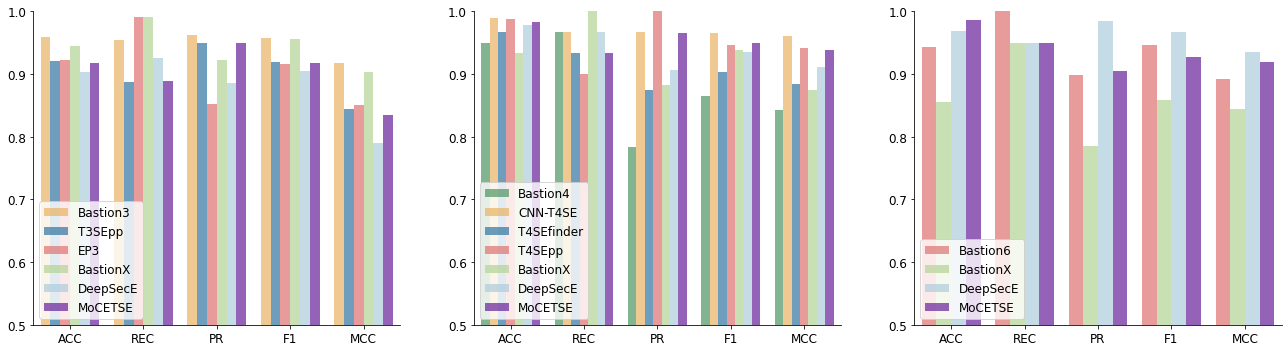

In [56]:
# 读取数据
data = pd.read_csv('data/benchmarking.csv')
plot_data = data.melt(id_vars=['Method', 'Task'], 
                      value_vars=['ACC', 'REC', 'PR', 'F1', 'MCC'])
plot_data.columns = ['Method', 'Task', 'Metric', 'Value']

model_to_color = {
    "Bastion3":   "#FFB84D",  
    "T3SEpp":     "#1E78B5",  
    "EP3":        "#F0625F",  
    
    "Bastion4":   "#44A05C", 
    
    "CNN-T4SE":   "#FFB84D",  
    "T4SEfinder": "#1E78B5", 
    
    "T4SEpp":     "#F0625F",  
   
    "Bastion6":   "#F0625F", 
    
    "BastionX":   "#B2DF8A",  
    "DeepSecE":   "#A5CEE4",  
    "MoCETSE":    "#6A0DAD"   
}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

tasks = ['T3SE', 'T4SE', 'T6SE']
for i, task in enumerate(tasks):

    sns.barplot(x='Metric', y='Value', hue='Method',
                data=plot_data[plot_data['Task'] == task],
                palette=model_to_color,
                ax=axes[i], alpha=0.7)

    
    axes[i].set_xlabel('')
    axes[i].set_ylim([0.5, 1.0])
    
    axes[i].legend(loc='lower left', fontsize=12, frameon=True)
    
    axes[i].set_ylabel('')

sns.despine()
plt.tight_layout()

plt.subplots_adjust(wspace=0.20)

plt.savefig('png/benchmarking.png', dpi=600, bbox_inches='tight')
plt.show()

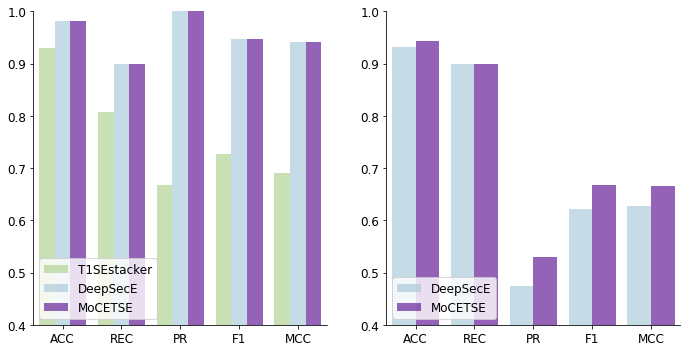

In [57]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

model_to_color = {
    "T1SEstacker": "#B2DF8A",
    "DeepSecE":    "#A5CEE4",
    "MoCETSE":     "#6A0DAD"
}

sns.barplot(
    x='Metric', y='Value', hue='Method',
    data=plot_data[plot_data['Task'] == 'T1SE'],
    palette=model_to_color,
    ax=ax1, alpha=0.7
)

ax1.set_ylabel('')

ax1.legend(loc='lower left', fontsize=12, frameon=True)

sns.barplot(
    x='Metric', y='Value', hue='Method',
    data=plot_data[plot_data['Task'] == 'T2SE'],
    palette=model_to_color,
    ax=ax2, alpha=0.7
)
ax2.set_ylabel('') 

ax2.tick_params(labelleft=True) 

ax2.legend(loc='lower left', fontsize=12, frameon=True)


for ax in [ax1, ax2]:
    ax.set_xlabel('')
    ax.set_ylim([0.4, 1.0])
    sns.despine(ax=ax)

plt.tight_layout()
plt.subplots_adjust(right=0.95, wspace=0.20)

plt.savefig('png/benchmarking_t1se_t2se.png', dpi=600, bbox_inches='tight')
plt.show()